<a href="https://colab.research.google.com/github/adcaceres69/pruebasPython/blob/main/GESTION/Analisis_ALTAS_2023_2709.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#pip install ydata-profiling

In [19]:
#from ydata_profiling import ProfileReport

In [3]:
df = pd.read_excel('/ALTAS_2023_270923.xlsx')

In [41]:
df.sample(5)

,LEGA01,ESTR01,ENTIDAD,NRODOC,ORGA_OFICINA,SRHESTR03_CODIGO,SRHESTR03_NOMBRE,SRHESTR01_FECHA_INGRESO,SRHESTR01_FECHA_ANTIGUEDAD,ESTADO,CANT_LIQ
171,103295,665158,ENCISO ROSALIA,27-21307483-6,Ministerio de Desarrollo Humano,18.01.08.003,Grado 21 - Técnico Asistencial,03/01/2023,2023-01-01,Activo,8
54,225496,673242,BALDIVIEZO RODRIGO,20-96230842-3,Ministerio de Desarrollo Humano,18.01.01.014,Grado 12 - Profesional 1,29/03/2023,2023-01-01,Activo,5
422,74270,683026,PEÑA SABRINA SOLEDAD,23-35624502-4,Ministerio de la Jefatura de Gabinete,04.01.010,Sector Administrativo - Categ.23(A-23),02/05/2023,2023-01-01,Activo,1
299,224126,665111,LANOZA DIEGO ARIEL,20-29011547-8,Servicio Provincial de Agua Potable y Saneamiento,05.13.003,O5-Spap-Cat(O5-12),10/01/2023,2023-01-10,Activo,8
463,146628,685220,ROBLES CARLA PATRICIA ELIZABETH,27-35624860-6,"Ministerio de Economía, Hacienda y Finanzas",04.01.010,Sector Administrativo - Categ.23(A-23),01/08/2023,2024-01-01,Activo,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   LEGA01                      595 non-null    int64         
 1   ESTR01                      595 non-null    int64         
 2   ENTIDAD                     595 non-null    object        
 3   NRODOC                      595 non-null    object        
 4   ORGA_OFICINA                595 non-null    object        
 5   SRHESTR03_CODIGO            595 non-null    object        
 6   SRHESTR03_NOMBRE            595 non-null    object        
 7   SRHESTR01_FECHA_INGRESO     595 non-null    datetime64[ns]
 8   SRHESTR01_FECHA_ANTIGUEDAD  595 non-null    datetime64[ns]
 9   ESTADO                      595 non-null    object        
 10  CANT_LIQ                    595 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 51

In [36]:
df['SRHESTR01_FECHA_INGRESO'] = df['SRHESTR01_FECHA_INGRESO'].dt.strftime('%d/%m/%Y')

In [33]:
# Cantidad de Oficinas con datos de Altas
print('Cantidad de Oficinas con altas: ', df.ORGA_OFICINA.nunique())

Cantidad de Oficinas con altas:  25


In [34]:
# Cantidad de Legajos
print('Cantidad de legajos de alta: ', df.LEGA01.nunique())

Cantidad de legajos de alta:  595


In [40]:
# infgresos desde hasta
print('Fechas de ingreso desde: ', df.SRHESTR01_FECHA_INGRESO.min(), 'hasta', df.SRHESTR01_FECHA_INGRESO.max(), 'en los datos')

Fechas de ingreso desde:  01/01/2023 hasta 31/03/2023 en los datos


In [29]:
df['ORGA_OFICINA'].value_counts()

Ministerio de Desarrollo Humano                                                   225
Ministerio de Economía, Hacienda y Finanzas                                       108
Servicio Provincial de Agua Potable y Saneamiento                                  56
Universidad Provincial de Laguna Blanca                                            48
Ministerio de la Producción                                                        27
Dirección Provincial de Vialidad                                                   25
Ministerio de la Secretaría General del Poder Ejecutivo                            22
Ministerio de la Jefatura de Gabinete                                              17
Ministerio de la Comunidad                                                         14
Dirección de Compras y Suministros                                                 11
Secretaria de Ciencia y Tecnología                                                  9
Instituto Provincial de Acción Integral para el Pequeñ

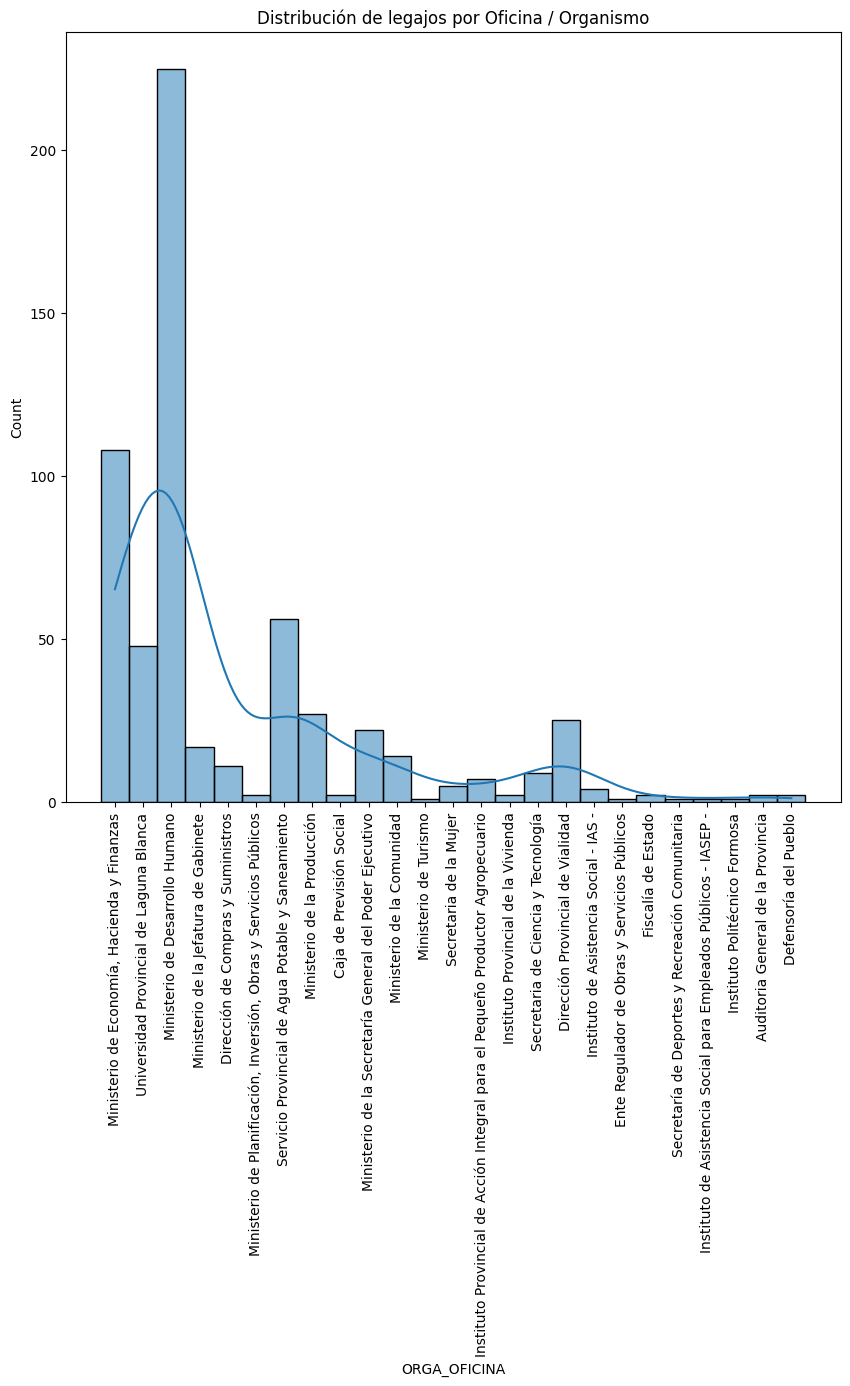

In [104]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='ORGA_OFICINA', bins=30, kde=True)
plt.title('Distribución de legajos por Oficina / Organismo')
plt.xticks(rotation=90)
plt.show()

In [79]:
# las 25 categorias con mas aparaiciones
print('LAS 25 CATEGORíAS CON MAS APARICIONES: \n')
df['SRHESTR03_NOMBRE'].value_counts().nlargest(25)

LAS 25 CATEGORíAS CON MAS APARICIONES: 



Sector Administrativo - Categ.23(A-23)                  77
Grado 12 - Profesional 1                                76
Sector Administrativo - Categ.21(A-21)                  54
Sector Administrativo - Categ.22(A-22)                  48
Grado 25 - Auxiliar Administrativo 2                    37
O5-Spap-Cat(O5-12)                                      34
Grado 15 - Residente 1                                  26
Vialidad(VF-10)                                         21
Sector Profesional - Categ.23(B-23)                     17
Sector Administrativo - Categ.19(A-19)                  16
Grado 24 - Auxiliar de Enfermería                       14
Mantenimiento,Producción y Servicios Generales Cat.7    14
AE-Spap-Cat(AE-19)                                      12
Grado 28 - Oficial de transportes 4                     12
Grado 21 - Técnico Asistencial                          10
Sector Administrativo - Categ.20(A-20)                  10
Personal Administrativo Cat.5                           

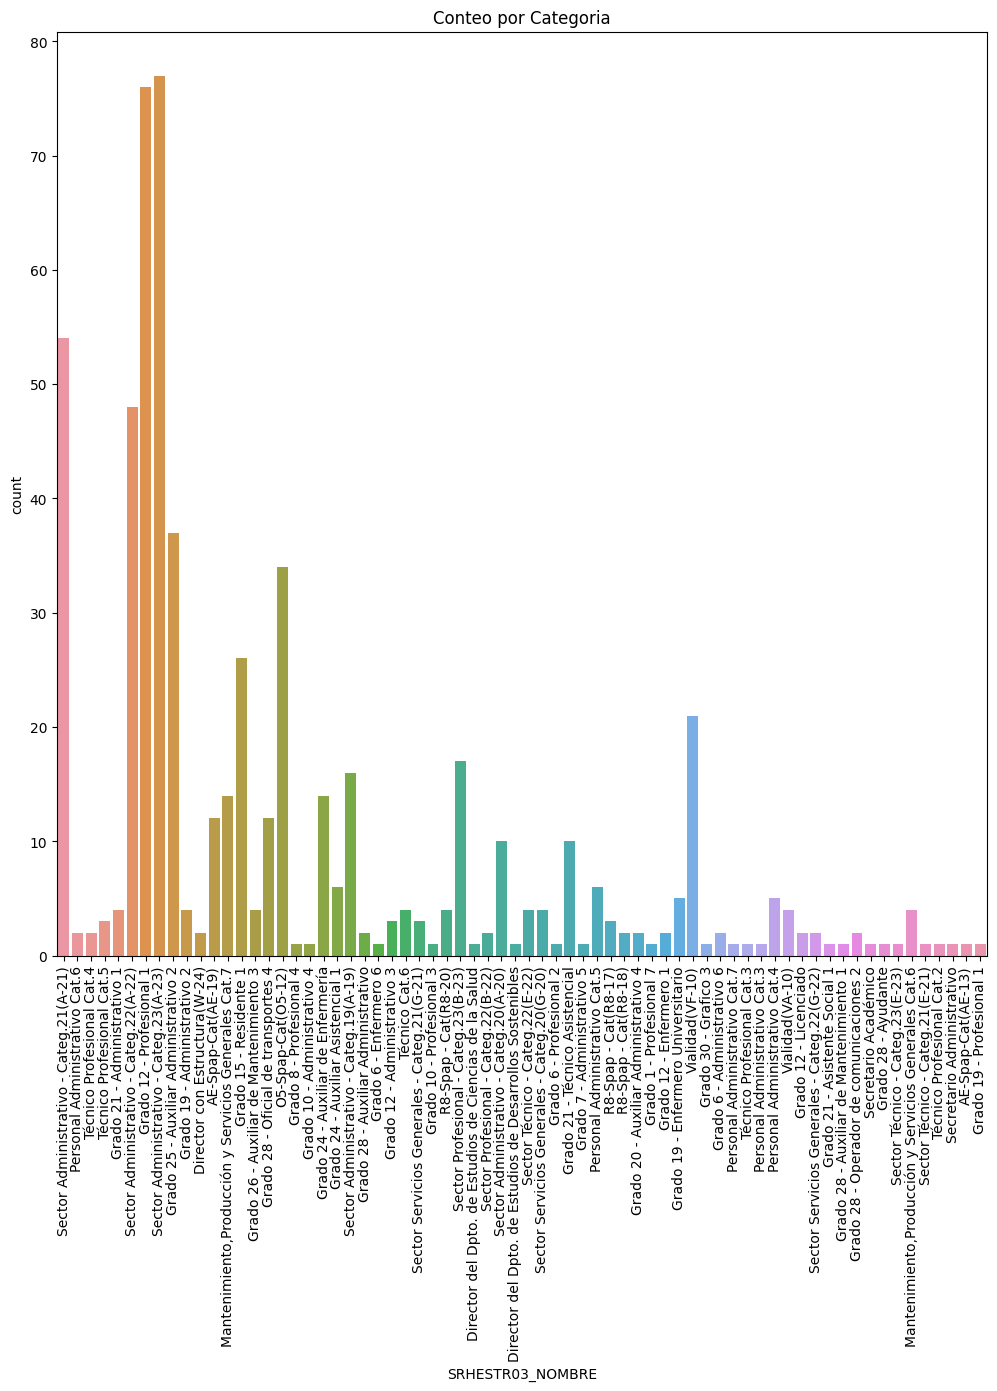

In [103]:
plt.figure(figsize=(12,12))
sns.countplot(data=df, x='SRHESTR03_NOMBRE')
plt.title('Conteo por Categoria')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#sns.countplot(data=df, x='SRHESTR03_NOMBRE')
#plt.xticks(rotation = 90)

In [ ]:
#df['ORGA_OFICINA'].hist(figsize=(13,13),bins=30, xrot=90)

In [ ]:
#df['ORGA_OFICINA'].hist() #figsize=(15,15),bins=30
#plt.title('Distribución de Organismo - Oficina')
#plt.xlabel('Organismo - Oficina')
#plt.ylabel('Frecuencia')
# Calcular las frecuencias y ordenar las etiquetas
#sorted_counts = df['ORGA_OFICINA'].value_counts().sort_index()
# Crear un gráfico de barras con etiquetas ordenadas
#ax = sorted_counts.plot(kind='bar', figsize=(10,10))
#plt.xticks(rotation=90)
#for i, value in enumerate(sorted_counts):
#    ax.text(i, value, str(value), ha='center', va='bottom')
#plt.show()

In [ ]:
# ProfileReport(df, title="Profiling Report")